<a href="https://colab.research.google.com/github/beaten-by-the-market/dart_disclosure/blob/main/stockcollateral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 필요한 패키지 import

In [ ]:
#-----------------------------------------------------------
#필요한 패키지 import
#-----------------------------------------------------------
import pandas as pd
from google.colab import drive

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np
from datetime import datetime

# 한글 폰트 설정 (Google Colab 환경에서)
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# Matplotlib 폰트 캐시 삭제
font_manager.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
font_manager._load_fontmanager(try_read_cache=False)

font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=10)
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126315 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

In [ ]:
# 구글 드라이브 마운트
drive.mount('/content/drive')

## 파일 불러오기(데이터가이드)

In [ ]:
# 엑셀파일의 데이터를 데이터프레임으로 불러오고 칼럼명 확인하기
df_kospi = pd.read_excel('/content/drive/MyDrive/beatenbythemarket/stockcollateral3.xlsx', sheet_name='kospi', skiprows = 8, dtype=str)
print(df_kospi.columns)

# 엑셀파일의 데이터를 데이터프레임으로 불러오고 칼럼명 확인하기
df_kosdaq = pd.read_excel('/content/drive/MyDrive/beatenbythemarket/stockcollateral3.xlsx', sheet_name='kosdaq', skiprows = 8, dtype=str)
print(df_kosdaq.columns)

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', '담보주식수', '공시일가치(종가)',
       '공시일가치(수정주가)', '기준일 가치(수정주가)', '지수산정주식수 대비 담보비율', '이벤트'],
      dtype='object')
Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', '담보주식수', '공시일가치(종가)',
       '공시일가치(수정주가)', '기준일 가치(수정주가)', '지수산정주식수 대비 담보비율', '이벤트'],
      dtype='object')


In [ ]:
# 칼럼명 수정
column_names = ['기준일', '코드', '종목명', '담보주식수', '공시일가치_종가',
                '공시일가치_수정주가', '기준일가치_수정주가',
                '지수산정주식수_대비_담보비율', '이벤트']

df_kospi.columns = column_names
df_kosdaq.columns = column_names

In [ ]:
# 칼럼 타입 변경하기
df_kospi['담보주식수'] = df_kospi['담보주식수'].astype(float)
df_kospi['지수산정주식수_대비_담보비율'] = df_kospi['지수산정주식수_대비_담보비율'].astype(float)/100
df_kospi['공시일가치_종가'] = df_kospi['공시일가치_종가'].astype(float)
df_kospi['공시일가치_수정주가'] = df_kospi['공시일가치_수정주가'].astype(float)
df_kospi['기준일가치_수정주가'] = df_kospi['기준일가치_수정주가'].astype(float)

df_kosdaq['담보주식수'] = df_kosdaq['담보주식수'].astype(float)
df_kosdaq['지수산정주식수_대비_담보비율'] = df_kosdaq['지수산정주식수_대비_담보비율'].astype(float)/100
df_kosdaq['공시일가치_종가'] = df_kosdaq['공시일가치_종가'].astype(float)
df_kosdaq['공시일가치_수정주가'] = df_kosdaq['공시일가치_수정주가'].astype(float)
df_kosdaq['기준일가치_수정주가'] = df_kosdaq['기준일가치_수정주가'].astype(float)

In [ ]:
# 확인해보기
print("행의 개수: " + str(len(df_kospi)))

# 확인해보기
print('상위 10개 행만 확인해보기')
df_show = df_kospi.copy().head(10)

# HTML 변환 및 커스텀 태그로 감싸기
html_table = df_show.to_html(index=False, classes="dataframe", escape=False)

# 테이블을 <div> 태그로 감싸기
wrapped_html = f"""
<div class="table-container">
  {html_table}
</div>
"""
print(html_table)

# 확인해보기
print("행의 개수: " + str(len(df_kosdaq)))

# 확인해보기
print('상위 10개 행만 확인해보기')
df_show = df_kosdaq.copy().head(10)

# HTML 변환 및 커스텀 태그로 감싸기
html_table = df_show.to_html(index=False, classes="dataframe", escape=False)

# 테이블을 <div> 태그로 감싸기
wrapped_html = f"""
<div class="table-container">
  {html_table}
</div>
"""
print(html_table)

행의 개수: 479
상위 10개 행만 확인해보기
<table border="1" class="dataframe dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>기준일</th>
      <th>코드</th>
      <th>종목명</th>
      <th>담보주식수</th>
      <th>공시일가치_종가</th>
      <th>공시일가치_수정주가</th>
      <th>기준일가치_수정주가</th>
      <th>지수산정주식수_대비_담보비율</th>
      <th>이벤트</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>2025-04-11 00:00:00</td>
      <td>A000020</td>
      <td>동화약품</td>
      <td>528054.0</td>
      <td>3.231690e+09</td>
      <td>3.231690e+09</td>
      <td>3.136641e+09</td>
      <td>0.018905</td>
      <td>NaN</td>
    </tr>
    <tr>
      <td>2025-04-11 00:00:00</td>
      <td>A000050</td>
      <td>경방</td>
      <td>5143684.0</td>
      <td>3.117073e+10</td>
      <td>3.117073e+10</td>
      <td>3.405119e+10</td>
      <td>0.187621</td>
      <td>무상증자 주식발행초과금 자본전입[2012/12/27], 무상증자 주식발행초과금 자본전입[2013/12/27]</td>
    </tr>
    <tr>
      <td>2025-04-11 00:00:00</td>
      <td>A000070</td>
      <td>삼양홀딩스</td>
      

In [ ]:
# 지수산정주식수_대비_담보비율 칼럼이 누락된 행은 제거
df_kospi2 = df_kospi[~df_kospi['지수산정주식수_대비_담보비율'].isna()]
df_kosdaq2 = df_kosdaq[~df_kosdaq['지수산정주식수_대비_담보비율'].isna()]

print('kospi 행 개수')
print(len(df_kospi))
print('kospi 삭제행 개수')
print(len(df_kospi)-len(df_kospi2))
print('kosdaq 행 개수')
print(len(df_kosdaq))
print('kosdaq 삭제행 개수')
print(len(df_kosdaq)-len(df_kosdaq2))

kospi 행 개수
479
kospi 삭제행 개수
0
kosdaq 행 개수
857
kosdaq 삭제행 개수
0


## 구간별 분포 시각화

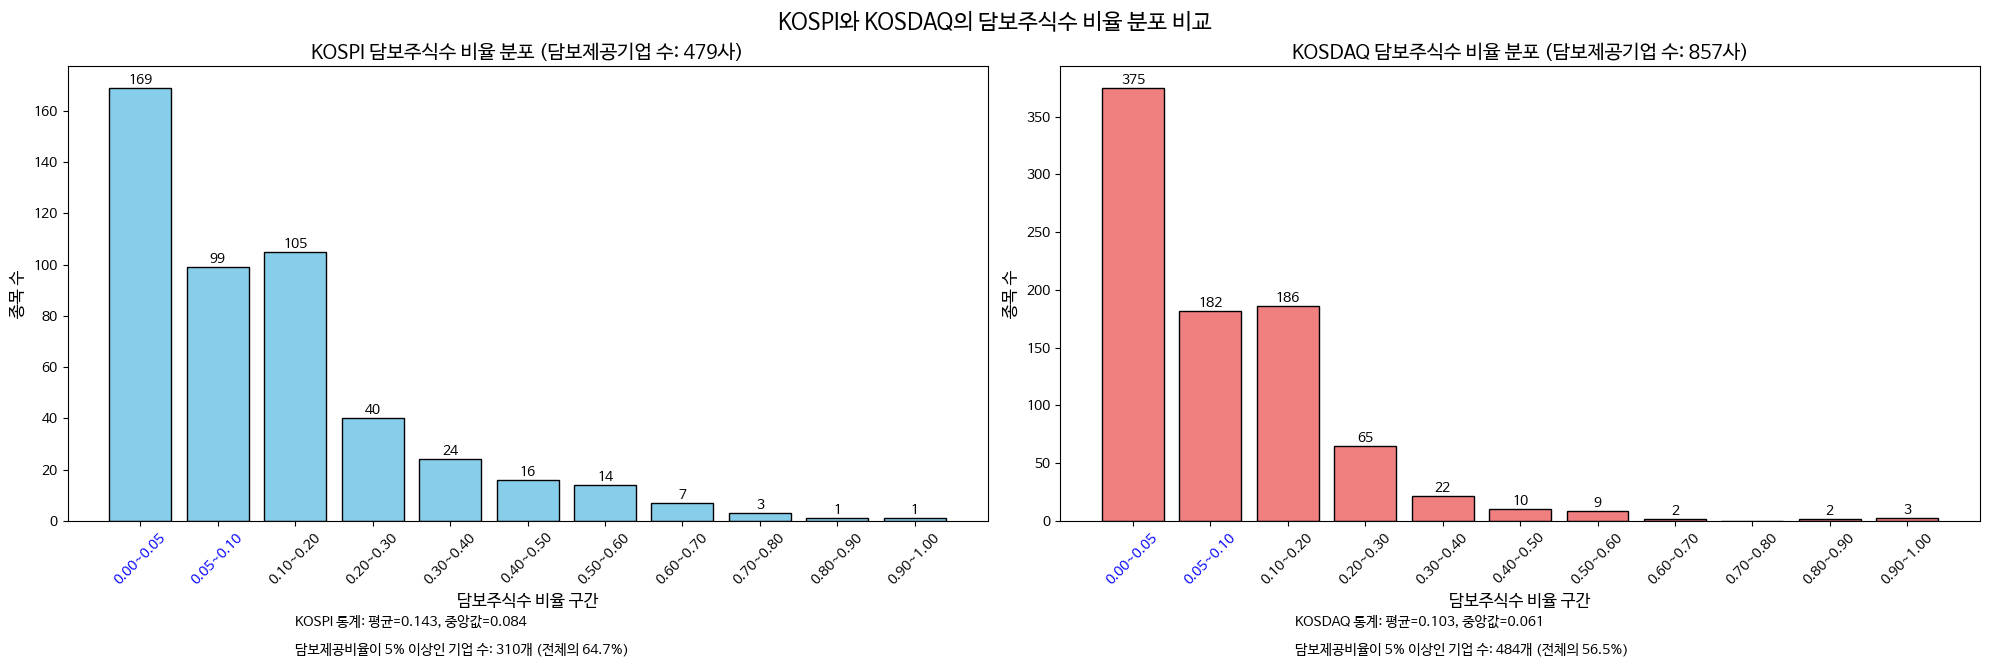

In [ ]:
# 하나의 figure에 두 개의 axes 생성 (좌우 배치)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

# 담보제공기업 수 계산
kospi_count = len(df_kospi2)
kosdaq_count = len(df_kosdaq2)

# 1. KOSPI 담보주식수 비율 히스토그램 (왼쪽 그래프)
# 히스토그램을 위한 데이터 준비 - 0~0.05, 0.05~0.1, 0.1~0.2, ... 구간 생성
bins = [0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
labels = [f'{bins[i]:.2f}~{bins[i+1]:.2f}' for i in range(len(bins)-1)]

# 구간별로 데이터 분류
df_kospi2['구간'] = pd.cut(df_kospi2['지수산정주식수_대비_담보비율'], bins=bins, labels=labels, include_lowest=True)

# 히스토그램 데이터 계산
hist_data_kospi = df_kospi2['구간'].value_counts().sort_index()

# 히스토그램 그리기
bars_kospi = ax1.bar(
    hist_data_kospi.index,  # 구간 레이블
    hist_data_kospi.values,  # 빈도수
    color='skyblue',  # 막대 색상
    edgecolor='black'  # 테두리 색상
)

# 막대 위에 빈도수 표시
for bar in bars_kospi:
    height = bar.get_height()
    if height > 0:  # 빈도가 0보다 큰 경우만 표시
        ax1.text(
            bar.get_x() + bar.get_width() / 2, height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=10
        )

# 그래프 설정
ax1.set_title(f'KOSPI 담보주식수 비율 분포 (담보제공기업 수: {kospi_count}사)', fontsize=14)
ax1.set_xlabel('담보주식수 비율 구간', fontsize=12)
ax1.set_ylabel('종목 수', fontsize=12)
ax1.tick_params(axis='x', rotation=45)  # x축 레이블 회전

# 0~0.05, 0.05~0.1 구간의 x축 레이블 색상을 파란색으로 변경
for i, label in enumerate(ax1.get_xticklabels()):
    if i < 2:  # 첫 두 개의 레이블 (0~0.05, 0.05~0.1)
        label.set_color('blue')

# 2. KOSDAQ 담보주식수 비율 히스토그램 (오른쪽 그래프)
# 히스토그램을 위한 데이터 준비
df_kosdaq2['구간'] = pd.cut(df_kosdaq2['지수산정주식수_대비_담보비율'], bins=bins, labels=labels, include_lowest=True)

# 히스토그램 데이터 계산
hist_data_kosdaq = df_kosdaq2['구간'].value_counts().sort_index()

# 히스토그램 그리기
bars_kosdaq = ax2.bar(
    hist_data_kosdaq.index,  # 구간 레이블
    hist_data_kosdaq.values,  # 빈도수
    color='lightcoral',  # 막대 색상
    edgecolor='black'  # 테두리 색상
)

# 막대 위에 빈도수 표시
for bar in bars_kosdaq:
    height = bar.get_height()
    if height > 0:  # 빈도가 0보다 큰 경우만 표시
        ax2.text(
            bar.get_x() + bar.get_width() / 2, height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=10
        )

# 그래프 설정
ax2.set_title(f'KOSDAQ 담보주식수 비율 분포 (담보제공기업 수: {kosdaq_count}사)', fontsize=14)
ax2.set_xlabel('담보주식수 비율 구간', fontsize=12)
ax2.set_ylabel('종목 수', fontsize=12)
ax2.tick_params(axis='x', rotation=45)  # x축 레이블 회전

# 0~0.05, 0.05~0.1 구간의 x축 레이블 색상을 파란색으로 변경
for i, label in enumerate(ax2.get_xticklabels()):
    if i < 2:  # 첫 두 개의 레이블 (0~0.05, 0.05~0.1)
        label.set_color('blue')

# 전체 제목 및 레이아웃 조정
plt.tight_layout()
plt.subplots_adjust(top=0.9, bottom=0.25)  # bottom 파라미터를 더 크게 설정하여 하단 여백 추가 확보
fig.suptitle('KOSPI와 KOSDAQ의 담보주식수 비율 분포 비교', fontsize=16, y=0.98)

# 그래프에 KOSPI와 KOSDAQ의 통계 정보 추가
kospi_stats = f"KOSPI 통계: 평균={df_kospi2['지수산정주식수_대비_담보비율'].mean():.3f}, 중앙값={df_kospi2['지수산정주식수_대비_담보비율'].median():.3f}"
kosdaq_stats = f"KOSDAQ 통계: 평균={df_kosdaq2['지수산정주식수_대비_담보비율'].mean():.3f}, 중앙값={df_kosdaq2['지수산정주식수_대비_담보비율'].median():.3f}"

# 담보제공비율이 5% 이상인 기업 수 계산
kospi_above_5_count = df_kospi2[df_kospi2['지수산정주식수_대비_담보비율'] >= 0.05].shape[0]
kosdaq_above_5_count = df_kosdaq2[df_kosdaq2['지수산정주식수_대비_담보비율'] >= 0.05].shape[0]

# 전체 기업 수 대비 비율 계산
kospi_total = df_kospi2.shape[0]
kosdaq_total = df_kosdaq2.shape[0]
kospi_above_5_pct = (kospi_above_5_count / kospi_total) * 100 if kospi_total > 0 else 0
kosdaq_above_5_pct = (kosdaq_above_5_count / kosdaq_total) * 100 if kosdaq_total > 0 else 0

# 담보제공비율 관련 통계 추가
kospi_collateral_stats = f"담보제공비율이 5% 이상인 기업 수: {kospi_above_5_count}개 (전체의 {kospi_above_5_pct:.1f}%)"
kosdaq_collateral_stats = f"담보제공비율이 5% 이상인 기업 수: {kosdaq_above_5_count}개 (전체의 {kosdaq_above_5_pct:.1f}%)"

# 통계 정보를 그래프 하단에 작은 텍스트로 추가
plt.figtext(0.15, 0.10, kospi_stats, fontsize=10)
plt.figtext(0.65, 0.10, kosdaq_stats, fontsize=10)
plt.figtext(0.15, 0.06, kospi_collateral_stats, fontsize=10)
plt.figtext(0.65, 0.06, kosdaq_collateral_stats, fontsize=10)

plt.show()


## 70% 넘는 게 현실적으로 가능한가?

In [ ]:
df_all = pd.concat([df_kospi2, df_kosdaq2])
df_outlier = df_all[df_all['지수산정주식수_대비_담보비율'] >= 0.7]


# 확인해보기
print("행의 개수: " + str(len(df_outlier)))

# 확인해보기
df_show = df_outlier.copy()

# HTML 변환 및 커스텀 태그로 감싸기
html_table = df_show.to_html(index=False, classes="dataframe", escape=False)

# 테이블을 <div> 태그로 감싸기
wrapped_html = f"""
<div class="table-container">
  {html_table}
</div>
"""
print(html_table)
df_show

행의 개수: 11
<table border="1" class="dataframe dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>기준일</th>
      <th>코드</th>
      <th>종목명</th>
      <th>담보주식수</th>
      <th>공시일가치_종가</th>
      <th>공시일가치_수정주가</th>
      <th>기준일가치_수정주가</th>
      <th>지수산정주식수_대비_담보비율</th>
      <th>이벤트</th>
      <th>구간</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>2025-04-11 00:00:00</td>
      <td>A000400</td>
      <td>롯데손해보험</td>
      <td>239082287.0</td>
      <td>4.865325e+11</td>
      <td>4.865325e+11</td>
      <td>3.868351e+11</td>
      <td>0.770397</td>
      <td>NaN</td>
      <td>0.70~0.80</td>
    </tr>
    <tr>
      <td>2025-04-11 00:00:00</td>
      <td>A000650</td>
      <td>천일고속</td>
      <td>1132497.0</td>
      <td>4.280839e+10</td>
      <td>4.280839e+10</td>
      <td>4.462038e+10</td>
      <td>0.792388</td>
      <td>NaN</td>
      <td>0.70~0.80</td>
    </tr>
    <tr>
      <td>2025-04-11 00:00:00</td>
      <td>A002990</td>
      <td>금호건설</td>
      

,기준일,코드,종목명,담보주식수,공시일가치_종가,공시일가치_수정주가,기준일가치_수정주가,지수산정주식수_대비_담보비율,이벤트,구간
12,2025-04-11 00:00:00,A000400,롯데손해보험,239082287.0,4.865325e+11,4.865325e+11,3.868351e+11,0.770397,NaN,0.70~0.80
18,2025-04-11 00:00:00,A000650,천일고속,1132497.0,4.280839e+10,4.280839e+10,4.462038e+10,0.792388,NaN,0.70~0.80
83,2025-04-11 00:00:00,A002990,금호건설,32650654.0,3.281391e+11,3.281391e+11,8.440194e+10,0.891268,유상증자 주주우선배정[2012/04/17],0.80~0.90
94,2025-04-11 00:00:00,A003280,흥아해운,180000000.0,5.103000e+11,5.103000e+11,2.818800e+11,0.748674,NaN,0.70~0.80
97,2025-04-11 00:00:00,A003410,쌍용C&E,436304010.0,3.054128e+12,3.054128e+12,NaN,0.983138,유상증자 주주배정[2016/05/25],0.90~1.00
98,2025-04-11 00:00:00,A029960,코엔텍,42113109.0,3.739644e+11,3.739644e+11,3.748067e+11,0.842262,NaN,0.80~0.90
238,2025-04-11 00:00:00,A048260,오스템임플란트(주),1282547.0,2.436839e+12,2.436839e+12,NaN,0.823386,NaN,0.80~0.90
448,2025-04-11 00:00:00,A085370,(주)루트로닉,25423159.0,9.330299e+11,9.330299e+11,NaN,0.982663,NaN,0.90~1.00
613,2025-04-11 00:00:00,A138580,비즈니스온,22328262.0,3.539030e+11,3.539030e+11,NaN,0.993990,무상증자 주식발행초과금 자본전입[2021/11/16],0.90~1.00
680,2025-04-11 00:00:00,A194510,(주)넥스쳐,12058466.0,1.676127e+11,1.676127e+11,NaN,0.992965,NaN,0.90~1.00


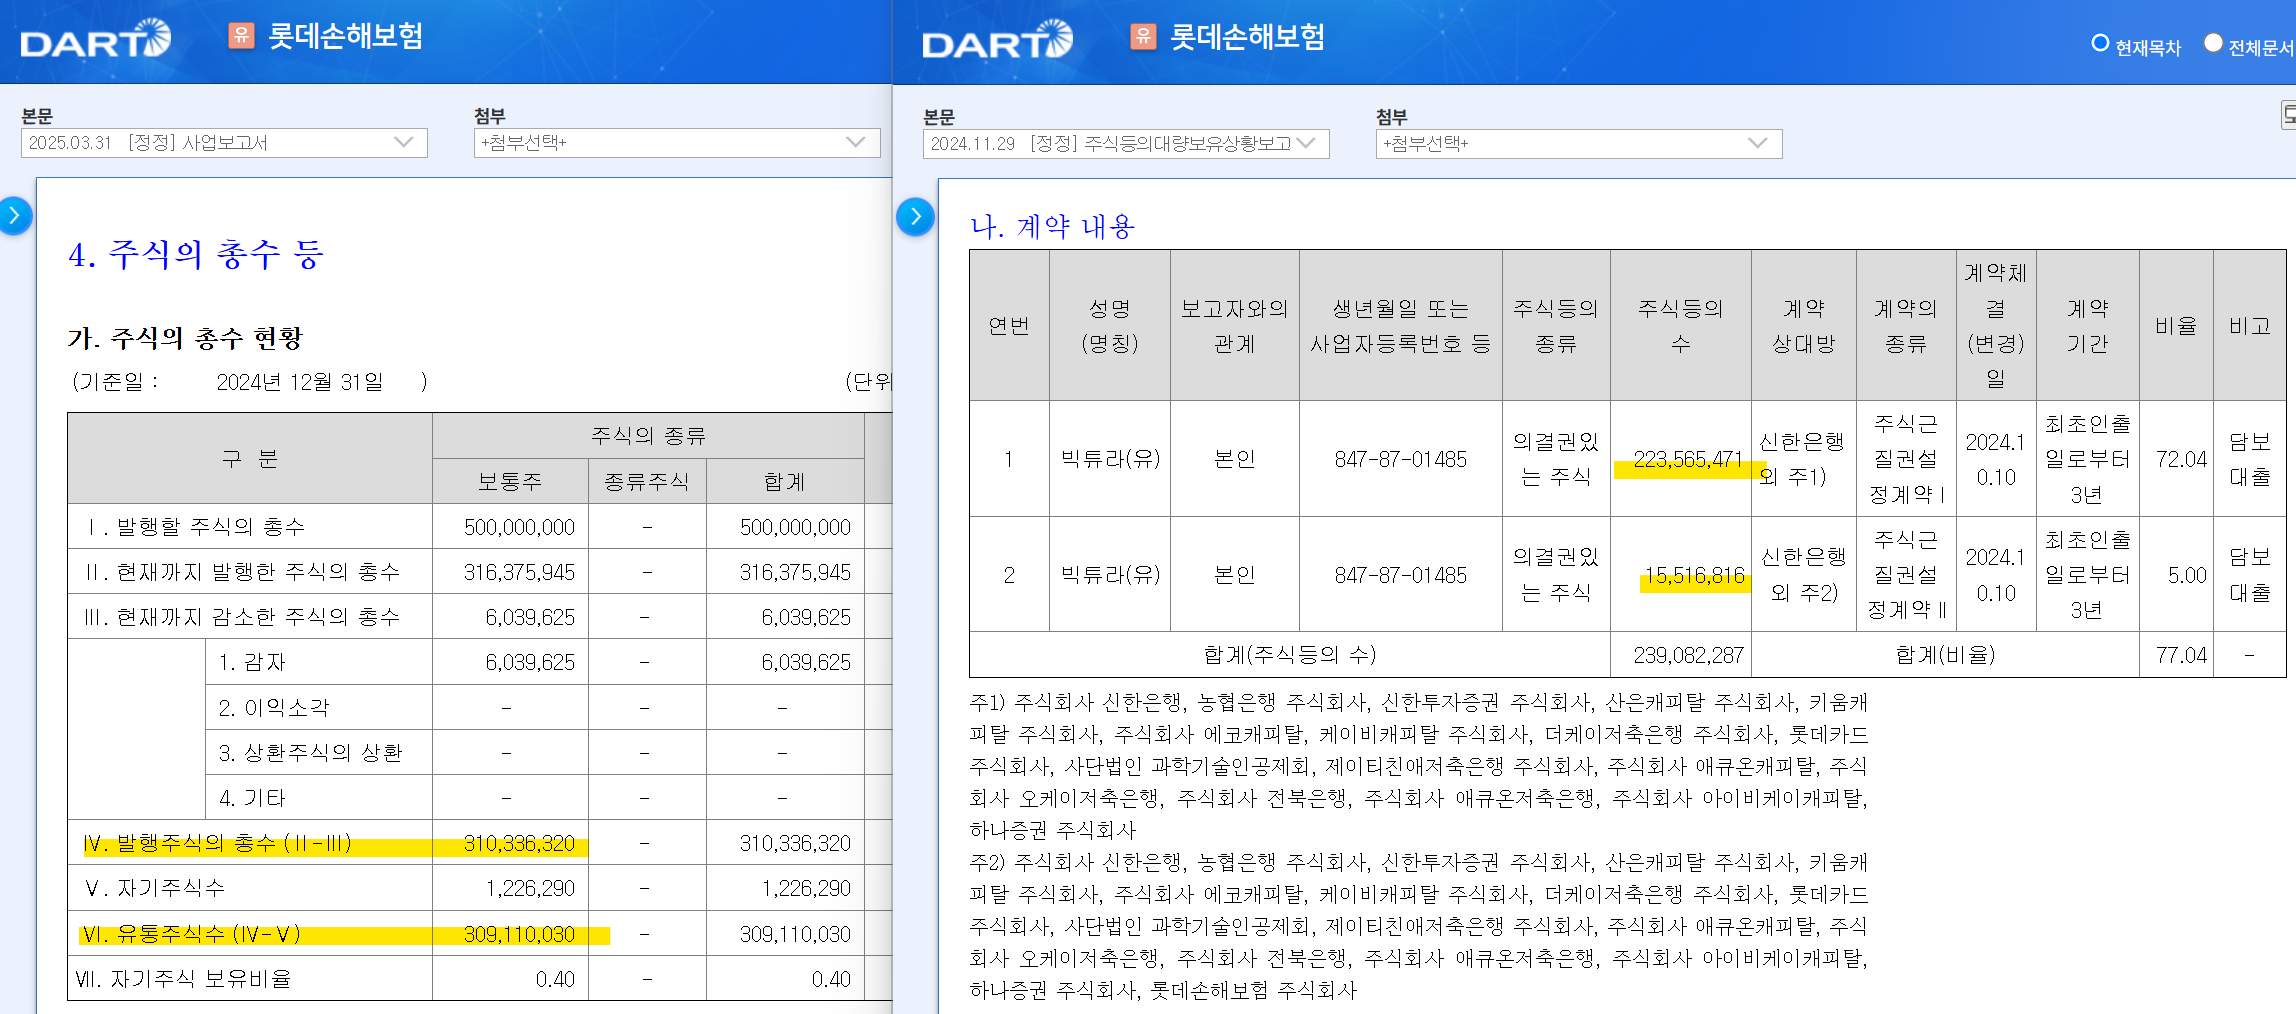

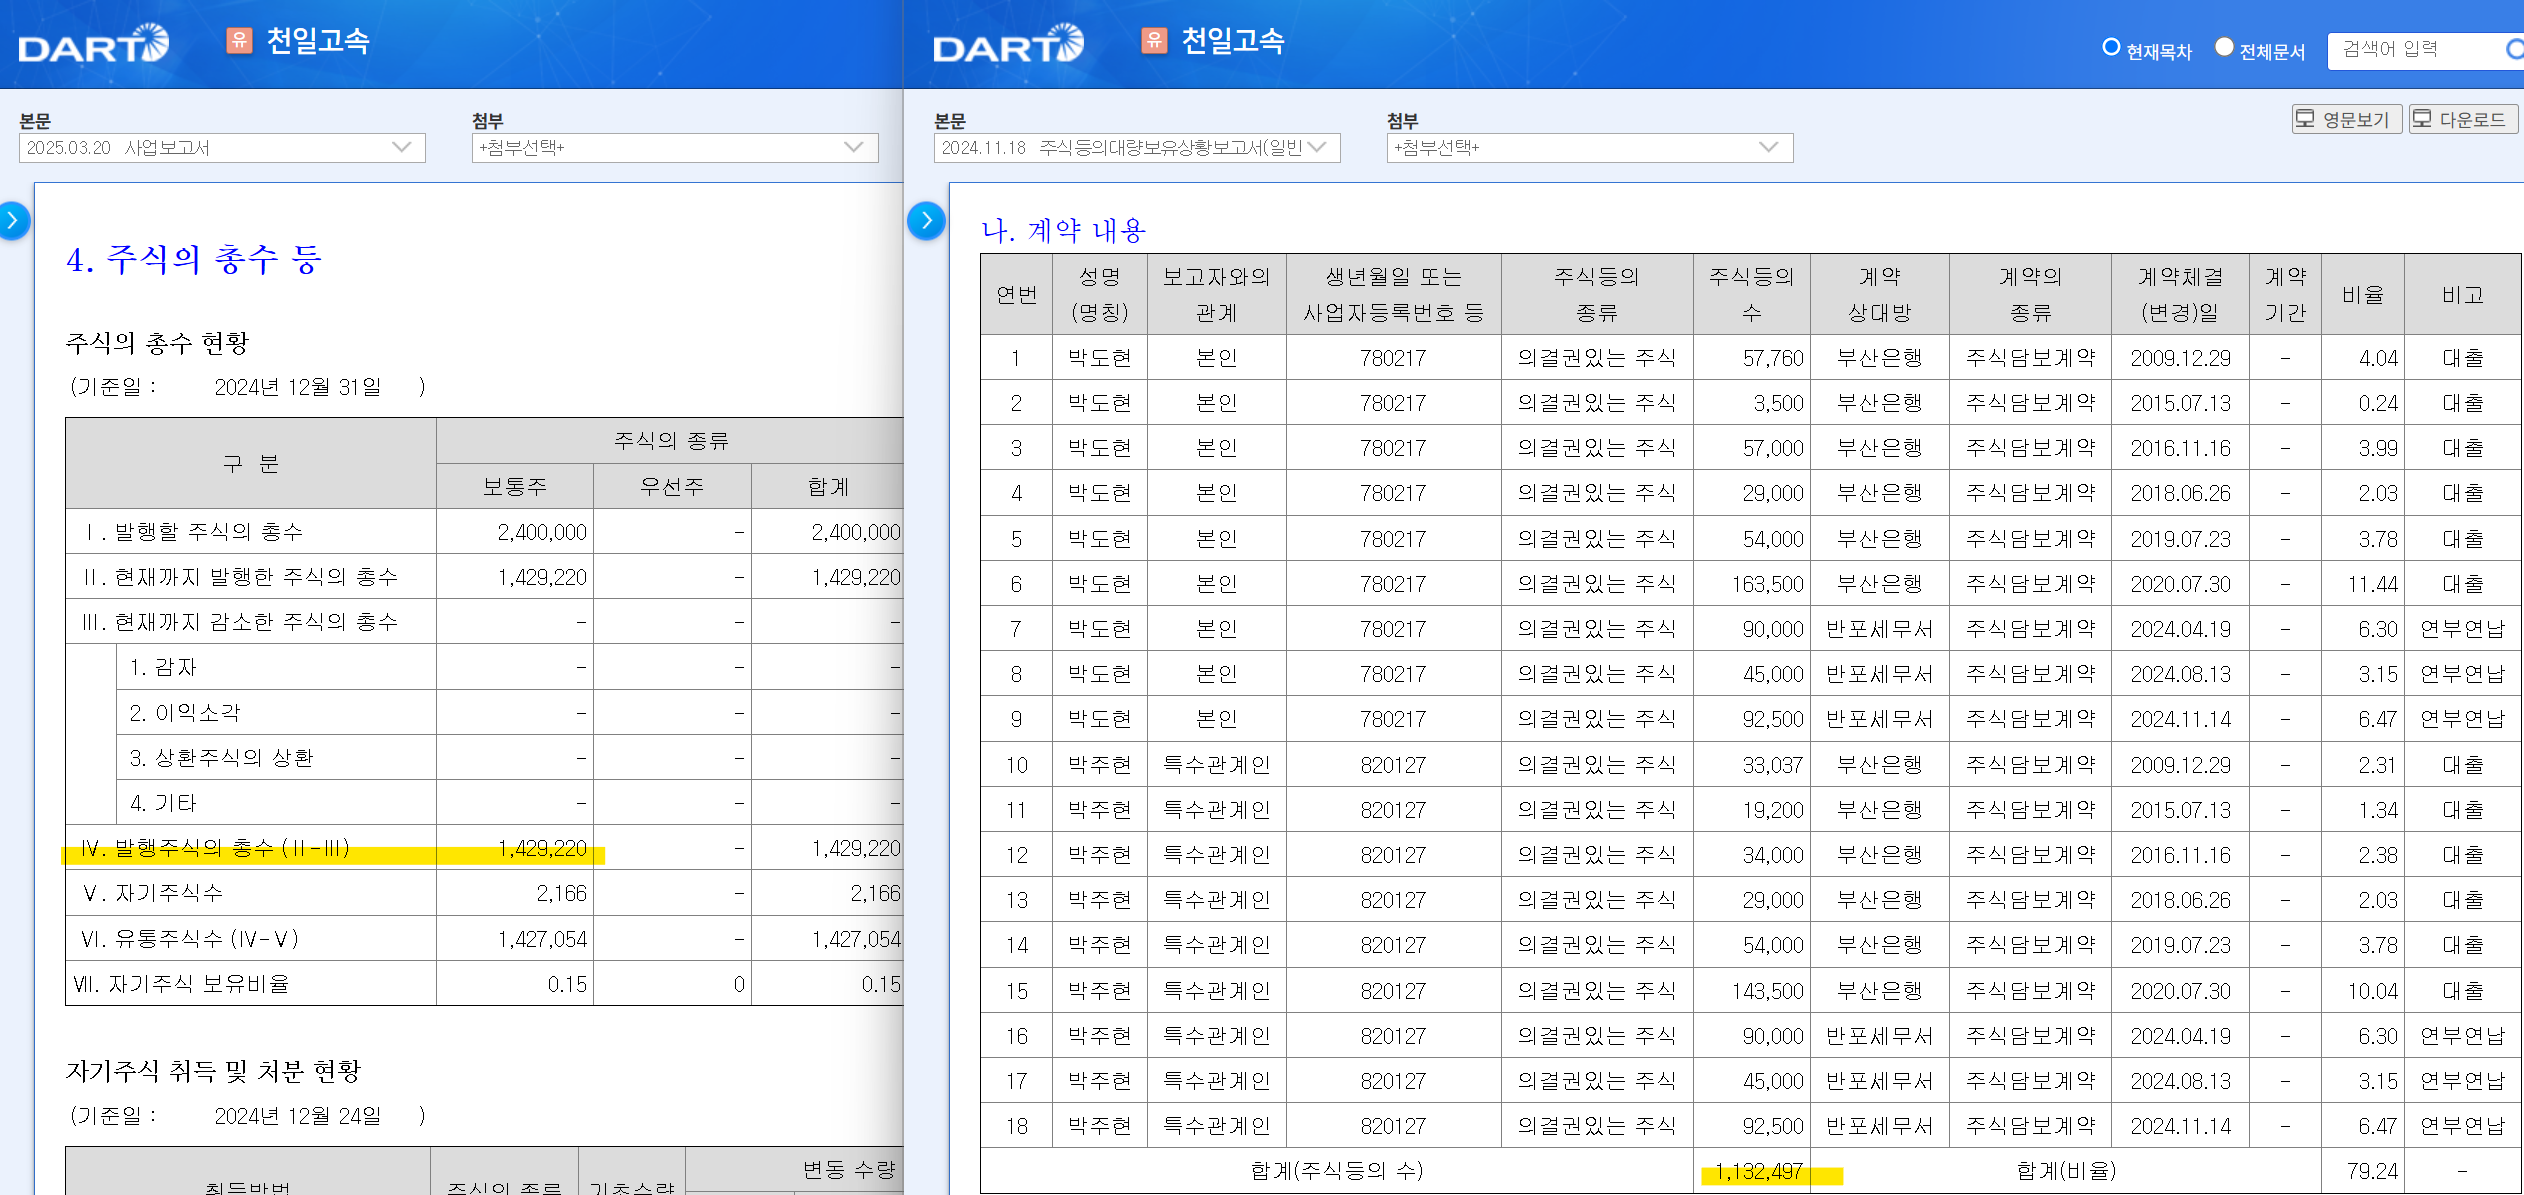

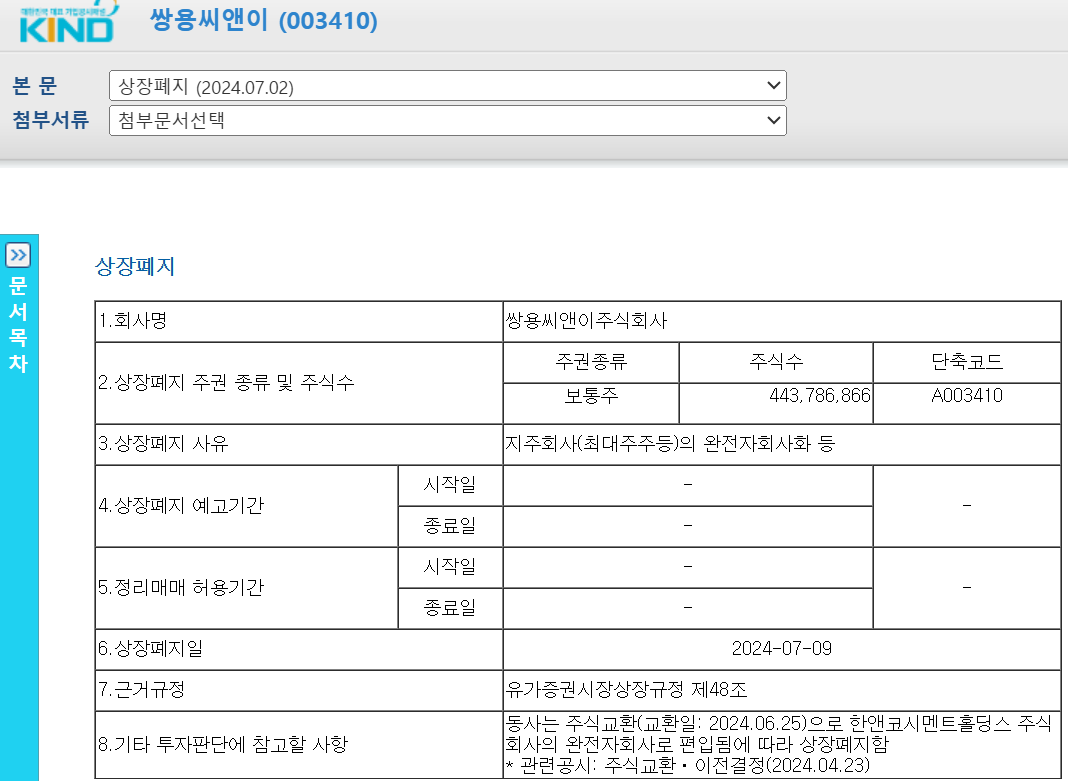

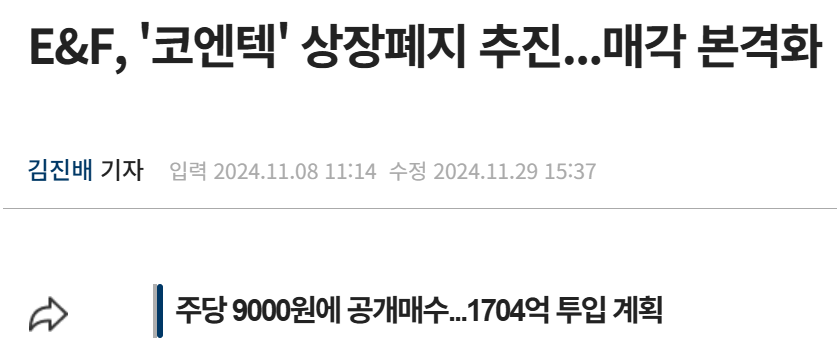

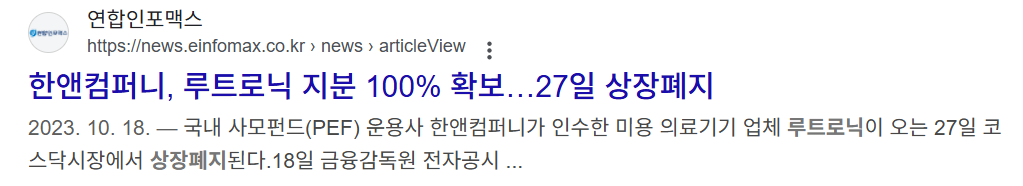

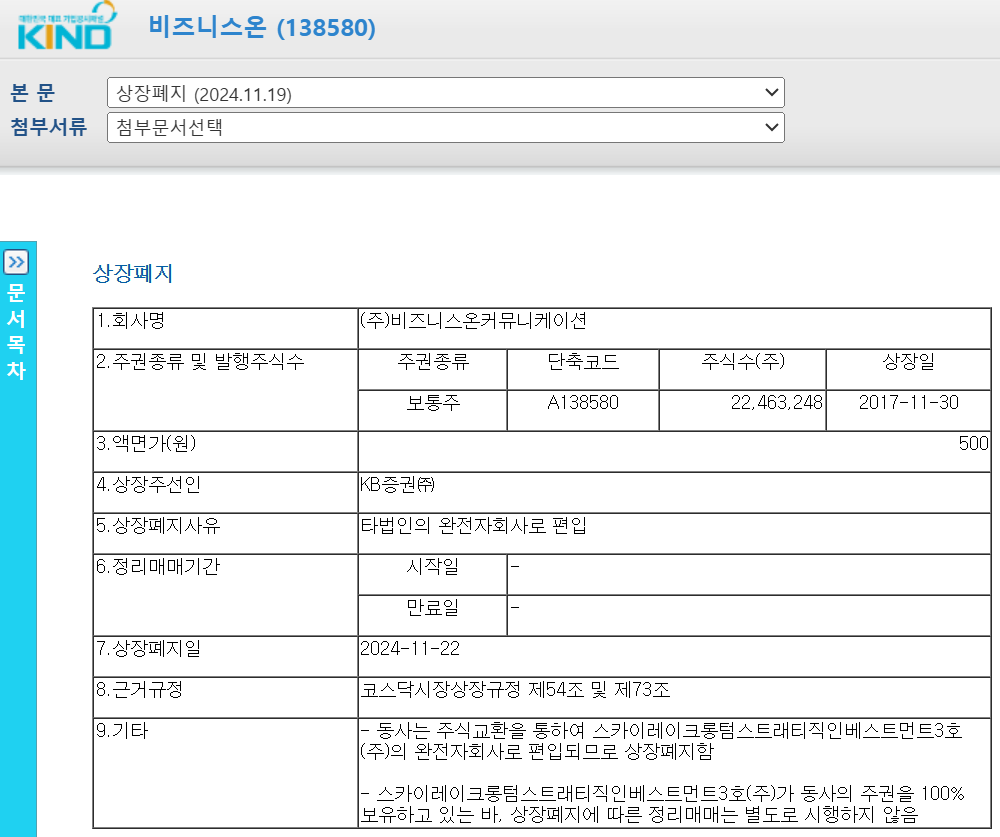

## 현재 상장된 종목으로만 한정해서 보기

In [ ]:
#-----------------------------------------------------------
#필요한 패키지 import
#-----------------------------------------------------------
import requests
from io import BytesIO
import warnings

In [ ]:
#-----------------------------------------------------------
#정보데이터시스템에서 주권표준코드 불러오는 과정
#-----------------------------------------------------------

#화면번호 12005(전종목기본정보)
#거래소 홈페이지에서 불러오기
gen_otp_url = 'http://data.krx.co.kr/comm/fileDn/GenerateOTP/generate.cmd'
gen_otp = {
    'locale' : 'ko_KR',
    'mktId': 'ALL',
    'share': '1',
    'csvxls_isNo': 'false',
    'name': 'fileDown',
    'url': 'dbms/MDC/STAT/standard/MDCSTAT01901'
    }

headers = {'Referer' : 'http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201020201',
           'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

otp = requests.post(gen_otp_url, gen_otp, headers = headers).text

down_url = 'http://data.krx.co.kr/comm/fileDn/download_csv/download.cmd'
down_content = requests.post(down_url, {'code': otp}, headers = headers)


df_listed = pd.read_csv(BytesIO(down_content.content), encoding = 'EUC-KR')
df_listed['시장구분'] = df_listed['시장구분'].replace('KOSDAQ GLOBAL', 'KOSDAQ')
df_listed = df_listed.rename(columns=({'단축코드':'stock_code'}))

# 상위 5개 행만 확인
print(df_listed.head().to_markdown())

|    | 표준코드     |   stock_code | 한글 종목명            | 한글 종목약명   | 영문 종목명                     | 상장일     | 시장구분   | 증권구분   | 소속부     | 주식종류   |   액면가 |   상장주식수 |
|---:|:-------------|-------------:|:-----------------------|:----------------|:--------------------------------|:-----------|:-----------|:-----------|:-----------|:-----------|---------:|-------------:|
|  0 | KR7098120009 |       098120 | (주)마이크로컨텍솔루션 | 마이크로컨텍솔  | Micro Contact Solution Co.,Ltd. | 2008/09/23 | KOSDAQ     | 주권       | 중견기업부 | 보통주     |      500 |      8312766 |
|  1 | KR7009520008 |       009520 | (주)포스코엠텍         | 포스코엠텍      | POSCO M-TECH CO.,LTD.           | 1997/11/10 | KOSDAQ     | 주권       | 우량기업부 | 보통주     |      500 |     41642703 |
|  2 | KR7095570008 |       095570 | AJ네트웍스보통주       | AJ네트웍스      | AJ Networks Co.,Ltd.            | 2015/08/21 | KOSPI      | 주권       | nan        | 보통주     |     1000 |     45252759 |
|  3 | KR7006840003 |       006840 | AK홀딩스보통주         | AK홀딩스        | AK Holdings, I

In [ ]:
# stock_code에 A를 붙여서 리스트로 만들기
stock_code = ['A' + str(code) for code in df_listed['stock_code']]

In [ ]:
# df_kospi2, df_kosdaq2 의 코드 칼럼에서 stock_code에 포함되어 있지 않은 행은 제거
df_kospi3 = df_kospi2[df_kospi2['코드'].isin(stock_code)]
df_kosdaq3 = df_kosdaq2[df_kosdaq2['코드'].isin(stock_code)]

print('kospi 행 개수')
print(len(df_kospi3))
print('kospi 삭제행 개수')
print(len(df_kospi2)-len(df_kospi3))
print('kosdaq 행 개수')
print(len(df_kosdaq3))
print('kosdaq 삭제행 개수')
print(len(df_kosdaq2)-len(df_kosdaq3))

kospi 행 개수
468
kospi 삭제행 개수
11
kosdaq 행 개수
788
kosdaq 삭제행 개수
69


In [ ]:
# 제거된 행 확인
df_kospi_del = df_kospi2[~df_kospi2['코드'].isin(stock_code)]
df_kosdaq_del = df_kosdaq2[~df_kosdaq2['코드'].isin(stock_code)]
df_del = pd.concat([df_kospi_del, df_kosdaq_del])

In [ ]:
# 확인해보기
print("행의 개수: " + str(len(df_del)))

# 확인해보기
df_show = df_del.copy()

# HTML 변환 및 커스텀 태그로 감싸기
html_table = df_show.to_html(index=False, classes="dataframe", escape=False)

# 테이블을 <div> 태그로 감싸기
wrapped_html = f"""
<div class="table-container">
  {html_table}
</div>
"""
print(html_table)
df_show

행의 개수: 80
<table border="1" class="dataframe dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>기준일</th>
      <th>코드</th>
      <th>종목명</th>
      <th>담보주식수</th>
      <th>공시일가치_종가</th>
      <th>공시일가치_수정주가</th>
      <th>기준일가치_수정주가</th>
      <th>지수산정주식수_대비_담보비율</th>
      <th>이벤트</th>
      <th>구간</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>2025-04-11 00:00:00</td>
      <td>A001880</td>
      <td>디엘건설(주)</td>
      <td>69736.0</td>
      <td>2.423326e+09</td>
      <td>2.423326e+09</td>
      <td>NaN</td>
      <td>0.003162</td>
      <td>NaN</td>
      <td>0.00~0.05</td>
    </tr>
    <tr>
      <td>2025-04-11 00:00:00</td>
      <td>A003410</td>
      <td>쌍용C&E</td>
      <td>436304010.0</td>
      <td>3.054128e+12</td>
      <td>3.054128e+12</td>
      <td>NaN</td>
      <td>0.983138</td>
      <td>유상증자 주주배정[2016/05/25]</td>
      <td>0.90~1.00</td>
    </tr>
    <tr>
      <td>2025-04-11 00:00:00</td>
      <td>A004200</td>
      <td>고려개발</td>
      

,기준일,코드,종목명,담보주식수,공시일가치_종가,공시일가치_수정주가,기준일가치_수정주가,지수산정주식수_대비_담보비율,이벤트,구간
57,2025-04-11 00:00:00,A001880,디엘건설(주),69736.0,2.423326e+09,2.423326e+09,NaN,0.003162,NaN,0.00~0.05
97,2025-04-11 00:00:00,A003410,쌍용C&E,436304010.0,3.054128e+12,3.054128e+12,NaN,0.983138,유상증자 주주배정[2016/05/25],0.90~1.00
116,2025-04-11 00:00:00,A004200,고려개발,9484275.0,3.983396e+10,7.966791e+10,NaN,0.311584,NaN,0.30~0.40
180,2025-04-11 00:00:00,A007630,(주)폴루스바이오팜,3117506.0,8.386091e+09,8.386091e+09,NaN,0.081128,NaN,0.05~0.10
210,2025-04-11 00:00:00,A010050,우리종합금융(주),20000000.0,7.200000e+09,1.261103e+10,NaN,0.111171,NaN,0.10~0.20
...,...,...,...,...,...,...,...,...,...,...
748,2025-04-11 00:00:00,A226350,(주)아이엠텍,909090.0,9.090900e+08,2.272725e+10,NaN,0.036885,NaN,0.00~0.05
791,2025-04-11 00:00:00,A263540,어스앤에어로스페이스,1020000.0,7.599000e+09,8.311367e+10,NaN,0.127155,NaN,0.10~0.20
804,2025-04-11 00:00:00,A268600,셀리버리,452869.0,3.025165e+09,3.025165e+09,NaN,0.012385,"무상증자 주식발행초과금 자본전입[2021/02/01], 무상증자 주식발행초과금 자본...",0.00~0.05
815,2025-04-11 00:00:00,A287410,제이시스메디칼,7613030.0,9.820809e+10,9.820809e+10,NaN,0.100578,NaN,0.10~0.20


In [ ]:
#-----------------------------------------------------------
#정보데이터시스템에서 상장폐지종목 불러오는 과정
#-----------------------------------------------------------

#화면번호 20037 상장폐지종목 현황
#거래소 홈페이지에서 불러오기
gen_otp_url = 'http://data.krx.co.kr/comm/fileDn/GenerateOTP/generate.cmd'
gen_otp = {
    "locale": "ko_KR",
    "mktId": "ALL",
    "tboxisuCd_finder_listdelisu0_0": "전체",
    "isuCd": "ALL",
    "isuCd2": "ALL",
    "codeNmisuCd_finder_listdelisu0_0": "",
    "param1isuCd_finder_listdelisu0_0": "",
    "strtDd": "19500111",
    "endDd": "20250411",
    "share": "1",
    "csvxls_isNo": "true",
    "name": "fileDown",
    "url": "dbms/MDC/STAT/issue/MDCSTAT23801"
}

headers = {'Referer' : 'http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201020201',
           'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

otp = requests.post(gen_otp_url, gen_otp, headers = headers).text

down_url = 'http://data.krx.co.kr/comm/fileDn/download_csv/download.cmd'
down_content = requests.post(down_url, {'code': otp}, headers = headers)


df_delisted = pd.read_csv(BytesIO(down_content.content), encoding = 'EUC-KR')
df_delisted['시장구분'] = df_delisted['시장구분'].replace('KOSDAQ GLOBAL', 'KOSDAQ')
df_delisted = df_delisted.rename(columns=({'종목코드':'stock_code'}))

# 신주인수권증권/증서, 수익증권 제외하기
df_delisted = df_delisted[df_delisted['증권구분'].isin(['주권', '투자회사', '외국주권', '선박투자회사',
       '주식예탁증권', '부동산투자회사'])]

# 상위 5개 행만 확인
print(df_listed.head().to_markdown())

|    | 표준코드     |   stock_code | 한글 종목명            | 한글 종목약명   | 영문 종목명                     | 상장일     | 시장구분   | 증권구분   | 소속부     | 주식종류   |   액면가 |   상장주식수 |
|---:|:-------------|-------------:|:-----------------------|:----------------|:--------------------------------|:-----------|:-----------|:-----------|:-----------|:-----------|---------:|-------------:|
|  0 | KR7098120009 |       098120 | (주)마이크로컨텍솔루션 | 마이크로컨텍솔  | Micro Contact Solution Co.,Ltd. | 2008/09/23 | KOSDAQ     | 주권       | 중견기업부 | 보통주     |      500 |      8312766 |
|  1 | KR7009520008 |       009520 | (주)포스코엠텍         | 포스코엠텍      | POSCO M-TECH CO.,LTD.           | 1997/11/10 | KOSDAQ     | 주권       | 우량기업부 | 보통주     |      500 |     41642703 |
|  2 | KR7095570008 |       095570 | AJ네트웍스보통주       | AJ네트웍스      | AJ Networks Co.,Ltd.            | 2015/08/21 | KOSPI      | 주권       | nan        | 보통주     |     1000 |     45252759 |
|  3 | KR7006840003 |       006840 | AK홀딩스보통주         | AK홀딩스        | AK Holdings, I

In [ ]:
# stock_code에 A를 붙여서 리스트로 만들기
stock_code = ['A' + str(code) for code in df_delisted['stock_code']]

In [ ]:
# df_kospi2, df_kosdaq2 의 코드 칼럼에서 stock_code에 포함되어 있는 행은 제거
df_kospi3_1 = df_kospi2[~df_kospi2['코드'].isin(stock_code)]
df_kosdaq3_1 = df_kosdaq2[~df_kosdaq2['코드'].isin(stock_code)]

print('kospi 행 개수')
print(len(df_kospi3_1))
print('kospi 삭제행 개수')
print(len(df_kospi2)-len(df_kospi3_1))
print('kosdaq 행 개수')
print(len(df_kosdaq3_1))
print('kosdaq 삭제행 개수')
print(len(df_kosdaq2)-len(df_kosdaq3_1))

kospi 행 개수
468
kospi 삭제행 개수
11
kosdaq 행 개수
788
kosdaq 삭제행 개수
69


## 상폐종목 제외하고 구간별 분포 시각화

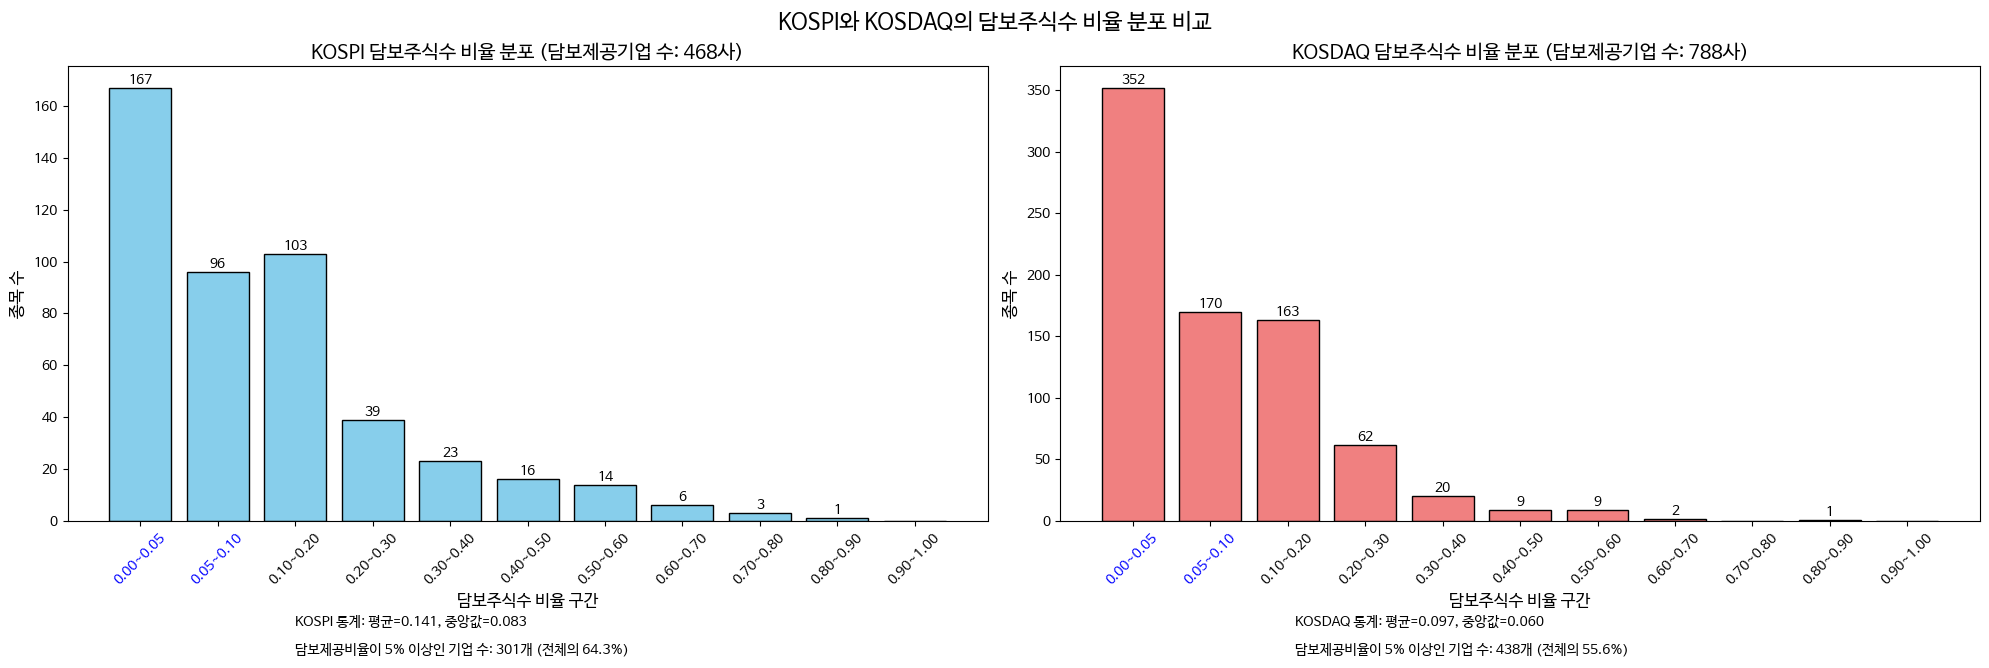

In [ ]:
# 하나의 figure에 두 개의 axes 생성 (좌우 배치)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

# 담보제공기업 수 계산
kospi_count = len(df_kospi3_1)
kosdaq_count = len(df_kosdaq3_1)

# 데이터프레임의 명시적 복사본 생성
df_kospi3_1_copy = df_kospi3_1.copy()
df_kosdaq3_1_copy = df_kosdaq3_1.copy()

# 1. KOSPI 담보주식수 비율 히스토그램 (왼쪽 그래프)
# 히스토그램을 위한 데이터 준비 - 0~0.05, 0.05~0.1, 0.1~0.2, ... 구간 생성
bins = [0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
labels = [f'{bins[i]:.2f}~{bins[i+1]:.2f}' for i in range(len(bins)-1)]

# 구간별로 데이터 분류
df_kospi3_1_copy['구간'] = pd.cut(df_kospi3_1_copy['지수산정주식수_대비_담보비율'], bins=bins, labels=labels, include_lowest=True)

# 히스토그램 데이터 계산
hist_data_kospi = df_kospi3_1_copy['구간'].value_counts().sort_index()

# 히스토그램 그리기
bars_kospi = ax1.bar(
    hist_data_kospi.index,  # 구간 레이블
    hist_data_kospi.values,  # 빈도수
    color='skyblue',  # 막대 색상
    edgecolor='black'  # 테두리 색상
)

# 막대 위에 빈도수 표시
for bar in bars_kospi:
    height = bar.get_height()
    if height > 0:  # 빈도가 0보다 큰 경우만 표시
        ax1.text(
            bar.get_x() + bar.get_width() / 2, height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=10
        )

# 그래프 설정
ax1.set_title(f'KOSPI 담보주식수 비율 분포 (담보제공기업 수: {kospi_count}사)', fontsize=14)
ax1.set_xlabel('담보주식수 비율 구간', fontsize=12)
ax1.set_ylabel('종목 수', fontsize=12)
ax1.tick_params(axis='x', rotation=45)  # x축 레이블 회전

# 0~0.05, 0.05~0.1 구간의 x축 레이블 색상을 파란색으로 변경
for i, label in enumerate(ax1.get_xticklabels()):
    if i < 2:  # 첫 두 개의 레이블 (0~0.05, 0.05~0.1)
        label.set_color('blue')

# 2. KOSDAQ 담보주식수 비율 히스토그램 (오른쪽 그래프)
# 히스토그램을 위한 데이터 준비
df_kosdaq3_1_copy['구간'] = pd.cut(df_kosdaq3_1_copy['지수산정주식수_대비_담보비율'], bins=bins, labels=labels, include_lowest=True)

# 히스토그램 데이터 계산
hist_data_kosdaq = df_kosdaq3_1_copy['구간'].value_counts().sort_index()

# 히스토그램 그리기
bars_kosdaq = ax2.bar(
    hist_data_kosdaq.index,  # 구간 레이블
    hist_data_kosdaq.values,  # 빈도수
    color='lightcoral',  # 막대 색상
    edgecolor='black'  # 테두리 색상
)

# 막대 위에 빈도수 표시
for bar in bars_kosdaq:
    height = bar.get_height()
    if height > 0:  # 빈도가 0보다 큰 경우만 표시
        ax2.text(
            bar.get_x() + bar.get_width() / 2, height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=10
        )

# 그래프 설정
ax2.set_title(f'KOSDAQ 담보주식수 비율 분포 (담보제공기업 수: {kosdaq_count}사)', fontsize=14)
ax2.set_xlabel('담보주식수 비율 구간', fontsize=12)
ax2.set_ylabel('종목 수', fontsize=12)
ax2.tick_params(axis='x', rotation=45)  # x축 레이블 회전

# 0~0.05, 0.05~0.1 구간의 x축 레이블 색상을 파란색으로 변경
for i, label in enumerate(ax2.get_xticklabels()):
    if i < 2:  # 첫 두 개의 레이블 (0~0.05, 0.05~0.1)
        label.set_color('blue')

# 전체 제목 및 레이아웃 조정
plt.tight_layout()
plt.subplots_adjust(top=0.9, bottom=0.25)  # bottom 파라미터를 더 크게 설정하여 하단 여백 추가 확보
fig.suptitle('KOSPI와 KOSDAQ의 담보주식수 비율 분포 비교', fontsize=16, y=0.98)

# 그래프에 KOSPI와 KOSDAQ의 통계 정보 추가
kospi_stats = f"KOSPI 통계: 평균={df_kospi3_1_copy['지수산정주식수_대비_담보비율'].mean():.3f}, 중앙값={df_kospi3_1_copy['지수산정주식수_대비_담보비율'].median():.3f}"
kosdaq_stats = f"KOSDAQ 통계: 평균={df_kosdaq3_1_copy['지수산정주식수_대비_담보비율'].mean():.3f}, 중앙값={df_kosdaq3_1_copy['지수산정주식수_대비_담보비율'].median():.3f}"

# 담보제공비율이 5% 이상인 기업 수 계산
kospi_above_5_count = df_kospi3_1_copy[df_kospi3_1_copy['지수산정주식수_대비_담보비율'] >= 0.05].shape[0]
kosdaq_above_5_count = df_kosdaq3_1_copy[df_kosdaq3_1_copy['지수산정주식수_대비_담보비율'] >= 0.05].shape[0]

# 전체 기업 수 대비 비율 계산
kospi_total = df_kospi3_1_copy.shape[0]
kosdaq_total = df_kosdaq3_1_copy.shape[0]
kospi_above_5_pct = (kospi_above_5_count / kospi_total) * 100 if kospi_total > 0 else 0
kosdaq_above_5_pct = (kosdaq_above_5_count / kosdaq_total) * 100 if kosdaq_total > 0 else 0

# 담보제공비율 관련 통계 추가
kospi_collateral_stats = f"담보제공비율이 5% 이상인 기업 수: {kospi_above_5_count}개 (전체의 {kospi_above_5_pct:.1f}%)"
kosdaq_collateral_stats = f"담보제공비율이 5% 이상인 기업 수: {kosdaq_above_5_count}개 (전체의 {kosdaq_above_5_pct:.1f}%)"

# 통계 정보를 그래프 하단에 작은 텍스트로 추가
plt.figtext(0.15, 0.10, kospi_stats, fontsize=10)
plt.figtext(0.65, 0.10, kosdaq_stats, fontsize=10)
plt.figtext(0.15, 0.06, kospi_collateral_stats, fontsize=10)
plt.figtext(0.65, 0.06, kosdaq_collateral_stats, fontsize=10)

plt.show()


## 주주별 주식수 대비 담보비율 분포 파악하기

## 파일 불러오기(데이터가이드)

In [ ]:
# 엑셀파일의 데이터를 데이터프레임으로 불러오고 칼럼명 확인하기
df_kospi = pd.read_excel('/content/drive/MyDrive/beatenbythemarket/stockcollateral3.xlsx', sheet_name='kospi_sh', skiprows = 8, dtype=str)
print(df_kospi.columns)

# 엑셀파일의 데이터를 데이터프레임으로 불러오고 칼럼명 확인하기
df_kosdaq = pd.read_excel('/content/drive/MyDrive/beatenbythemarket/stockcollateral3.xlsx', sheet_name='kosdaq_sh', skiprows = 8, dtype=str)
print(df_kosdaq.columns)

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', '주주', '보고자', '보고자와 관계',
       '담보주식수', '공시일가치(종가)', '공시일가치(수정주가)', '기준일 가치(수정주가)', '주주주식수 대비 담보비율',
       '지수산정주식수 대비 담보비율', '지수산정주식수 대비 보유비율', '이벤트'],
      dtype='object')
Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', '주주', '보고자', '보고자와 관계',
       '담보주식수', '공시일가치(종가)', '공시일가치(수정주가)', '기준일 가치(수정주가)', '주주주식수 대비 담보비율',
       '지수산정주식수 대비 담보비율', '지수산정주식수 대비 보유비율', '이벤트'],
      dtype='object')


In [ ]:
# 칼럼명 수정
column_names = ['기준일', '코드', '종목명', '주주', '보고자', '보고자와_관계',
                '담보주식수', '공시일가치_종가',
                '공시일가치_수정주가', '기준일가치_수정주가',
                '주주주식수_대비_담보비율',
                '지수산정주식수_대비_담보비율', '지수산정주식수_대비_보유비율',
                '이벤트']

df_kospi.columns = column_names
df_kosdaq.columns = column_names

In [ ]:
# 칼럼 타입 변경하기
df_kospi['담보주식수'] = df_kospi['담보주식수'].astype(float)
df_kospi['지수산정주식수_대비_담보비율'] = df_kospi['지수산정주식수_대비_담보비율'].astype(float)/100
df_kospi['공시일가치_종가'] = df_kospi['공시일가치_종가'].astype(float)
df_kospi['공시일가치_수정주가'] = df_kospi['공시일가치_수정주가'].astype(float)
df_kospi['기준일가치_수정주가'] = df_kospi['기준일가치_수정주가'].astype(float)
df_kospi['주주주식수_대비_담보비율'] = df_kospi['주주주식수_대비_담보비율'].astype(float)/100
df_kospi['지수산정주식수_대비_보유비율'] = df_kospi['지수산정주식수_대비_보유비율'].astype(float)/100


df_kosdaq['담보주식수'] = df_kosdaq['담보주식수'].astype(float)
df_kosdaq['지수산정주식수_대비_담보비율'] = df_kosdaq['지수산정주식수_대비_담보비율'].astype(float)/100
df_kosdaq['공시일가치_종가'] = df_kosdaq['공시일가치_종가'].astype(float)
df_kosdaq['공시일가치_수정주가'] = df_kosdaq['공시일가치_수정주가'].astype(float)
df_kosdaq['기준일가치_수정주가'] = df_kosdaq['기준일가치_수정주가'].astype(float)
df_kosdaq['주주주식수_대비_담보비율'] = df_kosdaq['주주주식수_대비_담보비율'].astype(float)/100
df_kosdaq['지수산정주식수_대비_보유비율'] = df_kosdaq['지수산정주식수_대비_보유비율'].astype(float)/100

In [ ]:
# 확인해보기
print("행의 개수: " + str(len(df_kospi)))

# 확인해보기
print('상위 10개 행만 확인해보기')
df_show = df_kospi.copy().head(10)

# HTML 변환 및 커스텀 태그로 감싸기
html_table = df_show.to_html(index=False, classes="dataframe", escape=False)

# 테이블을 <div> 태그로 감싸기
wrapped_html = f"""
<div class="table-container">
  {html_table}
</div>
"""
print(html_table)

# 확인해보기
print("행의 개수: " + str(len(df_kosdaq)))

# 확인해보기
print('상위 10개 행만 확인해보기')
df_show = df_kosdaq.copy().head(10)

# HTML 변환 및 커스텀 태그로 감싸기
html_table = df_show.to_html(index=False, classes="dataframe", escape=False)

# 테이블을 <div> 태그로 감싸기
wrapped_html = f"""
<div class="table-container">
  {html_table}
</div>
"""
print(html_table)

행의 개수: 874
상위 10개 행만 확인해보기
<table border="1" class="dataframe dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>기준일</th>
      <th>코드</th>
      <th>종목명</th>
      <th>주주</th>
      <th>보고자</th>
      <th>보고자와_관계</th>
      <th>담보주식수</th>
      <th>공시일가치_종가</th>
      <th>공시일가치_수정주가</th>
      <th>기준일가치_수정주가</th>
      <th>주주주식수_대비_담보비율</th>
      <th>지수산정주식수_대비_담보비율</th>
      <th>지수산정주식수_대비_보유비율</th>
      <th>이벤트</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>2025-04-11 00:00:00</td>
      <td>A000020</td>
      <td>동화약품</td>
      <td>윤인호</td>
      <td>윤도준</td>
      <td>특수관계인</td>
      <td>528054.0</td>
      <td>3.231690e+09</td>
      <td>3.231690e+09</td>
      <td>3.136641e+09</td>
      <td>0.293925</td>
      <td>0.018905</td>
      <td>0.064320</td>
      <td>NaN</td>
    </tr>
    <tr>
      <td>2025-04-11 00:00:00</td>
      <td>A000050</td>
      <td>경방</td>
      <td>경방어패럴</td>
      <td>김담</td>
      <td>특수관계인</td>
      <td>741403.0</td>
  

In [ ]:
# 지수산정주식수_대비_담보비율 칼럼이 누락된 행은 제거
df_kospi2 = df_kospi[~df_kospi['주주주식수_대비_담보비율'].isna()]
df_kosdaq2 = df_kosdaq[~df_kosdaq['주주주식수_대비_담보비율'].isna()]

print('kospi 행 개수')
print(len(df_kospi))
print('kospi 삭제행 개수')
print(len(df_kospi)-len(df_kospi2))
print('kosdaq 행 개수')
print(len(df_kosdaq))
print('kosdaq 삭제행 개수')
print(len(df_kosdaq)-len(df_kosdaq2))

kospi 행 개수
874
kospi 삭제행 개수
30
kosdaq 행 개수
1213
kosdaq 삭제행 개수
73


## 주주별 담보비율 구간별 분포 시각화

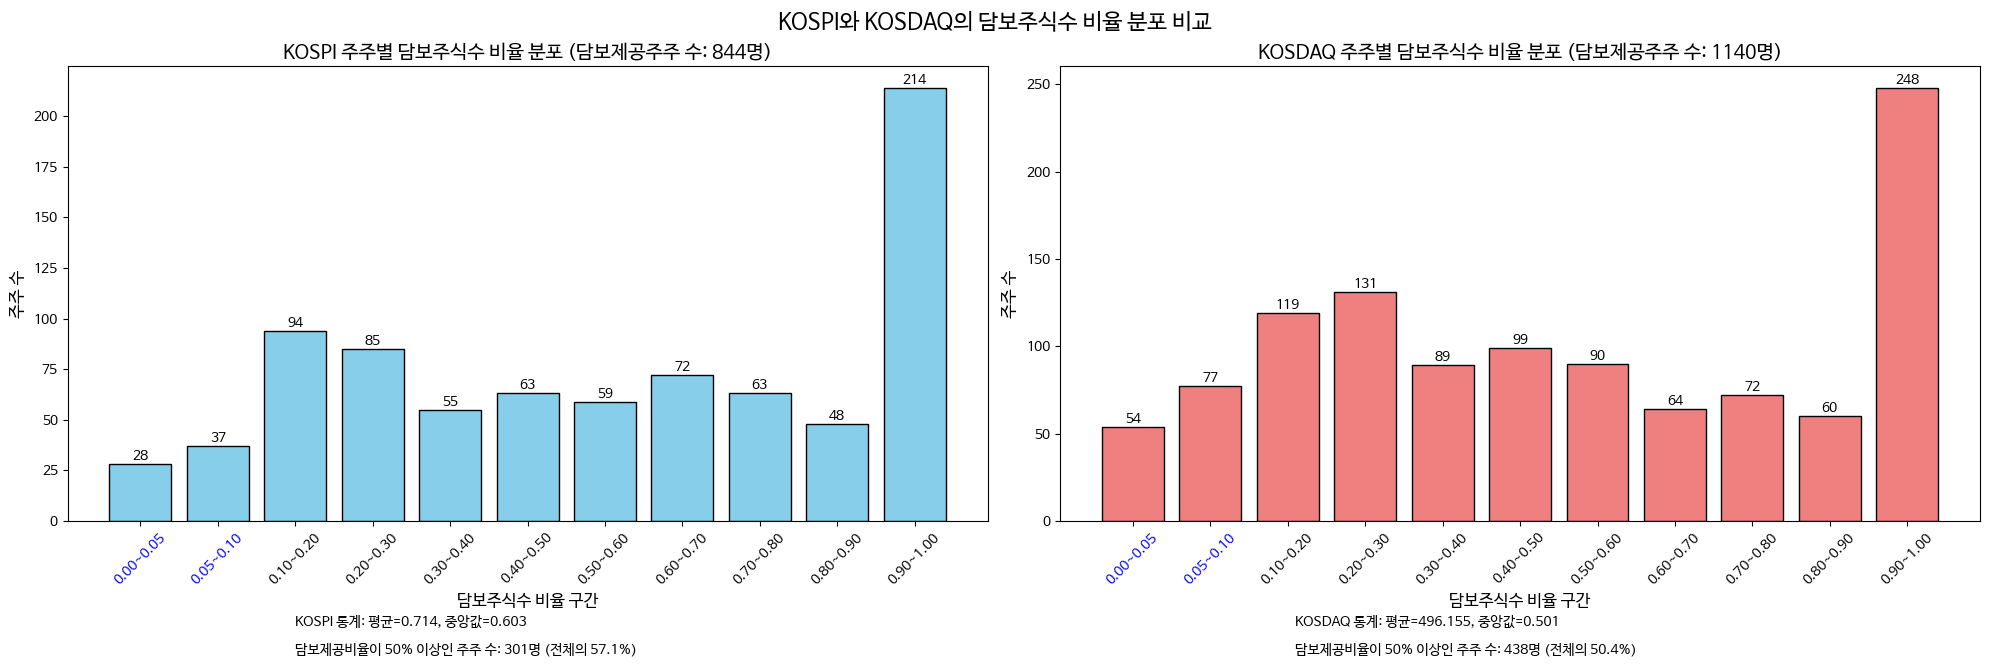

In [ ]:
# 하나의 figure에 두 개의 axes 생성 (좌우 배치)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

# 담보제공주주 수 계산
kospi_count = len(df_kospi2)
kosdaq_count = len(df_kosdaq2)


# 데이터프레임의 명시적 복사본 생성
df_kospi2_copy = df_kospi2.copy()
df_kosdaq2_copy = df_kosdaq2.copy()

# 1. KOSPI 담보주식수 비율 히스토그램 (왼쪽 그래프)
# 히스토그램을 위한 데이터 준비 - 0~0.05, 0.05~0.1, 0.1~0.2, ... 구간 생성
bins = [0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
labels = [f'{bins[i]:.2f}~{bins[i+1]:.2f}' for i in range(len(bins)-1)]

# 구간별로 데이터 분류
df_kospi2_copy['구간'] = pd.cut(df_kospi2_copy['주주주식수_대비_담보비율'], bins=bins, labels=labels, include_lowest=True)

# 히스토그램 데이터 계산
hist_data_kospi = df_kospi2_copy['구간'].value_counts().sort_index()

# 히스토그램 그리기
bars_kospi = ax1.bar(
    hist_data_kospi.index,  # 구간 레이블
    hist_data_kospi.values,  # 빈도수
    color='skyblue',  # 막대 색상
    edgecolor='black'  # 테두리 색상
)

# 막대 위에 빈도수 표시
for bar in bars_kospi:
    height = bar.get_height()
    if height > 0:  # 빈도가 0보다 큰 경우만 표시
        ax1.text(
            bar.get_x() + bar.get_width() / 2, height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=10
        )

# 그래프 설정
ax1.set_title(f'KOSPI 주주별 담보주식수 비율 분포 (담보제공주주 수: {kospi_count}명)', fontsize=14)
ax1.set_xlabel('담보주식수 비율 구간', fontsize=12)
ax1.set_ylabel('주주 수', fontsize=12)
ax1.tick_params(axis='x', rotation=45)  # x축 레이블 회전

# 0~0.05, 0.05~0.1 구간의 x축 레이블 색상을 파란색으로 변경
for i, label in enumerate(ax1.get_xticklabels()):
    if i < 2:  # 첫 두 개의 레이블 (0~0.05, 0.05~0.1)
        label.set_color('blue')

# 2. KOSDAQ 담보주식수 비율 히스토그램 (오른쪽 그래프)
# 히스토그램을 위한 데이터 준비
df_kosdaq2_copy['구간'] = pd.cut(df_kosdaq2_copy['주주주식수_대비_담보비율'], bins=bins, labels=labels, include_lowest=True)

# 히스토그램 데이터 계산
hist_data_kosdaq = df_kosdaq2_copy['구간'].value_counts().sort_index()

# 히스토그램 그리기
bars_kosdaq = ax2.bar(
    hist_data_kosdaq.index,  # 구간 레이블
    hist_data_kosdaq.values,  # 빈도수
    color='lightcoral',  # 막대 색상
    edgecolor='black'  # 테두리 색상
)

# 막대 위에 빈도수 표시
for bar in bars_kosdaq:
    height = bar.get_height()
    if height > 0:  # 빈도가 0보다 큰 경우만 표시
        ax2.text(
            bar.get_x() + bar.get_width() / 2, height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=10
        )

# 그래프 설정
ax2.set_title(f'KOSDAQ 주주별 담보주식수 비율 분포 (담보제공주주 수: {kosdaq_count}명)', fontsize=14)
ax2.set_xlabel('담보주식수 비율 구간', fontsize=12)
ax2.set_ylabel('주주 수', fontsize=12)
ax2.tick_params(axis='x', rotation=45)  # x축 레이블 회전

# 0~0.05, 0.05~0.1 구간의 x축 레이블 색상을 파란색으로 변경
for i, label in enumerate(ax2.get_xticklabels()):
    if i < 2:  # 첫 두 개의 레이블 (0~0.05, 0.05~0.1)
        label.set_color('blue')

# 전체 제목 및 레이아웃 조정
plt.tight_layout()
plt.subplots_adjust(top=0.9, bottom=0.25)  # bottom 파라미터를 더 크게 설정하여 하단 여백 추가 확보
fig.suptitle('KOSPI와 KOSDAQ의 담보주식수 비율 분포 비교', fontsize=16, y=0.98)

# 그래프에 KOSPI와 KOSDAQ의 통계 정보 추가
kospi_stats = f"KOSPI 통계: 평균={df_kospi2_copy['주주주식수_대비_담보비율'].mean():.3f}, 중앙값={df_kospi2_copy['주주주식수_대비_담보비율'].median():.3f}"
kosdaq_stats = f"KOSDAQ 통계: 평균={df_kosdaq2_copy['주주주식수_대비_담보비율'].mean():.3f}, 중앙값={df_kosdaq2_copy['주주주식수_대비_담보비율'].median():.3f}"

# 담보제공비율이 50% 이상인 주주 수 계산
kospi_above_50_count = df_kospi2_copy[df_kospi2_copy['주주주식수_대비_담보비율'] >= 0.5].shape[0]
kosdaq_above_50_count = df_kosdaq2_copy[df_kosdaq2_copy['주주주식수_대비_담보비율'] >= 0.5].shape[0]

# 전체 주주 수 대비 비율 계산
kospi_total = df_kospi2_copy.shape[0]
kosdaq_total = df_kosdaq2_copy.shape[0]
kospi_above_5_pct = (kospi_above_50_count / kospi_total) * 100 if kospi_total > 0 else 0
kosdaq_above_5_pct = (kosdaq_above_50_count / kosdaq_total) * 100 if kosdaq_total > 0 else 0

# 담보제공비율 관련 통계 추가
kospi_collateral_stats = f"담보제공비율이 50% 이상인 주주 수: {kospi_above_5_count}명 (전체의 {kospi_above_5_pct:.1f}%)"
kosdaq_collateral_stats = f"담보제공비율이 50% 이상인 주주 수: {kosdaq_above_5_count}명 (전체의 {kosdaq_above_5_pct:.1f}%)"

# 통계 정보를 그래프 하단에 작은 텍스트로 추가
plt.figtext(0.15, 0.10, kospi_stats, fontsize=10)
plt.figtext(0.65, 0.10, kosdaq_stats, fontsize=10)
plt.figtext(0.15, 0.06, kospi_collateral_stats, fontsize=10)
plt.figtext(0.65, 0.06, kosdaq_collateral_stats, fontsize=10)

plt.show()


## 아웃라이어 확인

In [ ]:
# 코스피 확인해보기
print('상위 10개 행만 확인해보기')
df_show = df_kospi2.sort_values('주주주식수_대비_담보비율', ascending = False).head(10)

# HTML 변환 및 커스텀 태그로 감싸기
html_table = df_show.to_html(index=False, classes="dataframe", escape=False)

# 테이블을 <div> 태그로 감싸기
wrapped_html = f"""
<div class="table-container">
  {html_table}
</div>
"""
print(html_table)
df_show

상위 10개 행만 확인해보기
<table border="1" class="dataframe dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>기준일</th>
      <th>코드</th>
      <th>종목명</th>
      <th>주주</th>
      <th>보고자</th>
      <th>보고자와_관계</th>
      <th>담보주식수</th>
      <th>공시일가치_종가</th>
      <th>공시일가치_수정주가</th>
      <th>기준일가치_수정주가</th>
      <th>주주주식수_대비_담보비율</th>
      <th>지수산정주식수_대비_담보비율</th>
      <th>지수산정주식수_대비_보유비율</th>
      <th>이벤트</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>2025-04-11 00:00:00</td>
      <td>A034730</td>
      <td>SK</td>
      <td>최영진</td>
      <td>최태원</td>
      <td>특수관계인</td>
      <td>15563.0</td>
      <td>1.856666e+09</td>
      <td>1.856666e+09</td>
      <td>1.876898e+09</td>
      <td>77.815000</td>
      <td>0.000214</td>
      <td>0.000003</td>
      <td>NaN</td>
    </tr>
    <tr>
      <td>2025-04-11 00:00:00</td>
      <td>A009240</td>
      <td>한샘</td>
      <td>하임1호유한회사</td>
      <td>하임유한회사</td>
      <td>공동보유자</td>
      <td>3880367.0</td>
      <

,기준일,코드,종목명,주주,보고자,보고자와_관계,담보주식수,공시일가치_종가,공시일가치_수정주가,기준일가치_수정주가,주주주식수_대비_담보비율,지수산정주식수_대비_담보비율,지수산정주식수_대비_보유비율,이벤트
602,2025-04-11 00:00:00,A034730,SK,최영진,최태원,특수관계인,15563.0,1.856666e+09,1.856666e+09,1.876898e+09,77.815000,0.000214,0.000003,NaN
395,2025-04-11 00:00:00,A009240,한샘,하임1호유한회사,하임유한회사,공동보유자,3880367.0,1.814072e+11,1.814072e+11,1.532745e+11,12.704395,0.164883,0.012978,NaN
782,2025-04-11 00:00:00,A117580,대성에너지,알앤알,대성홀딩스,특수관계인,2000000.0,1.242000e+10,1.242000e+10,1.506000e+10,5.000000,0.072727,0.014545,NaN
106,2025-04-11 00:00:00,A002140,고려산업,전상익,금강공업,특수관계인,300000.0,1.668000e+09,1.668000e+09,8.445000e+08,4.721955,0.012029,0.002547,NaN
58,2025-04-11 00:00:00,A001080,만호제강,엠케이에셋,엠케이에셋,본인,650556.0,2.335496e+10,2.335496e+10,1.701204e+10,4.383800,0.156760,0.035759,NaN
466,2025-04-11 00:00:00,A014680,한솔케미칼,조연주,조동혁,특수관계인,487080.0,5.348138e+10,5.348138e+10,5.299430e+10,3.023839,0.042970,0.014211,NaN
567,2025-04-11 00:00:00,A028100,동아지질,이정우,이정우,특수관계인,4582886.0,6.053992e+10,6.053992e+10,6.416040e+10,2.610817,0.342274,0.131099,NaN
657,2025-04-11 00:00:00,A058730,다스코,한시인,한상원,특수관계인,546000.0,1.692600e+09,1.692600e+09,1.632540e+09,2.184000,0.029047,0.013300,유상증자 주주우선배정[2016/03/03]
144,2025-04-11 00:00:00,A002990,금호건설,금호고속,금호고속,본인,32650654.0,3.281391e+11,3.281391e+11,8.440194e+10,2.000000,0.891268,0.445634,유상증자 주주우선배정[2012/04/17]
525,2025-04-11 00:00:00,A020120,키다리스튜디오,진도투자목적유한회사,진도투자목적유한회사,본인,4101314.0,1.593360e+10,1.593360e+10,1.626171e+10,2.000000,0.110655,0.055328,NaN


In [ ]:
# 코스닥 확인해보기
print('상위 10개 행만 확인해보기')
df_show = df_kosdaq2.sort_values('주주주식수_대비_담보비율', ascending = False).head(10)

# HTML 변환 및 커스텀 태그로 감싸기
html_table = df_show.to_html(index=False, classes="dataframe", escape=False)

# 테이블을 <div> 태그로 감싸기
wrapped_html = f"""
<div class="table-container">
  {html_table}
</div>
"""
print(html_table)
df_show

상위 10개 행만 확인해보기
<table border="1" class="dataframe dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>기준일</th>
      <th>코드</th>
      <th>종목명</th>
      <th>주주</th>
      <th>보고자</th>
      <th>보고자와_관계</th>
      <th>담보주식수</th>
      <th>공시일가치_종가</th>
      <th>공시일가치_수정주가</th>
      <th>기준일가치_수정주가</th>
      <th>주주주식수_대비_담보비율</th>
      <th>지수산정주식수_대비_담보비율</th>
      <th>지수산정주식수_대비_보유비율</th>
      <th>이벤트</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>2025-04-11 00:00:00</td>
      <td>A032860</td>
      <td>더라미</td>
      <td>코니퍼1호투자조합</td>
      <td>코니퍼1호투자조합</td>
      <td>본인</td>
      <td>1694915.0</td>
      <td>1.105085e+10</td>
      <td>1.105085e+10</td>
      <td>2.403389e+09</td>
      <td>564971.666666</td>
      <td>0.094496</td>
      <td>1.672580e-07</td>
      <td>NaN</td>
    </tr>
    <tr>
      <td>2025-04-11 00:00:00</td>
      <td>A019550</td>
      <td>SBI인베스트먼트</td>
      <td>케이티아이씨홀딩스</td>
      <td>에스비아이코리아홀딩스</td>
      <td>특수관계인</td>

,기준일,코드,종목명,주주,보고자,보고자와_관계,담보주식수,공시일가치_종가,공시일가치_수정주가,기준일가치_수정주가,주주주식수_대비_담보비율,지수산정주식수_대비_담보비율,지수산정주식수_대비_보유비율,이벤트
194,2025-04-11 00:00:00,A032860,더라미,코니퍼1호투자조합,코니퍼1호투자조합,본인,1694915.0,1.105085e+10,1.105085e+10,2.403389e+09,564971.666666,0.094496,1.672580e-07,NaN
106,2025-04-11 00:00:00,A019550,SBI인베스트먼트,케이티아이씨홀딩스,에스비아이코리아홀딩스,특수관계인,348129.0,3.150567e+08,2.955016e+08,2.608456e+08,5.843541,0.003662,6.267947e-04,NaN
408,2025-04-11 00:00:00,A052900,KX하이텍,지프라자,지프라자,본인,2749266.0,5.484786e+09,5.484786e+09,2.457844e+09,4.245269,0.076235,1.795768e-02,유상증자 주주우선배정[2014/09/04]
332,2025-04-11 00:00:00,A043590,웰킵스하이텍,파워리퍼블릭얼라이언스,파워리퍼블릭얼라이언스,본인,3811418.0,7.451322e+09,1.656181e+10,1.119853e+09,4.011119,0.163580,4.078167e-02,NaN
524,2025-04-11 00:00:00,A066410,버킷스튜디오,이니셜 1호투자조합,이니셜 1호투자조합,본인,26591189.0,3.065964e+10,3.065964e+10,3.065964e+10,3.435172,0.316148,9.203267e-02,유상증자 주주우선배정[2019/01/31]
230,2025-04-11 00:00:00,A036090,위지트,제이더블유인베스트먼트,제이더블유인베스트먼트,본인,15000000.0,2.257500e+10,2.000425e+10,1.104969e+10,3.267973,0.386938,1.184032e-01,NaN
422,2025-04-11 00:00:00,A053590,한국테크놀로지,한국이노베이션,한국이노베이션,본인,17400000.0,1.024860e+10,1.024860e+10,NaN,3.000000,0.110729,3.690973e-02,유상증자 주주우선배정[2018/05/14]
903,2025-04-11 00:00:00,A148150,세경하이테크,에스지에이치홀딩스,에스지에이치홀딩스,본인,21238950.0,1.393275e+11,1.393275e+11,1.369912e+11,2.904471,0.592267,2.039156e-01,무상증자 주식발행초과금 자본전입[2023/11/29]
260,2025-04-11 00:00:00,A038340,MIT,김우정,김우정,본인,3900000.0,4.309500e+09,9.878057e+10,NaN,2.733006,0.087078,3.186196e-02,NaN
652,2025-04-11 00:00:00,A086450,동국제약,권재범,권기범,특수관계인,1188565.0,1.795922e+11,3.591843e+10,1.776905e+10,2.732333,0.133666,4.892038e-02,NaN


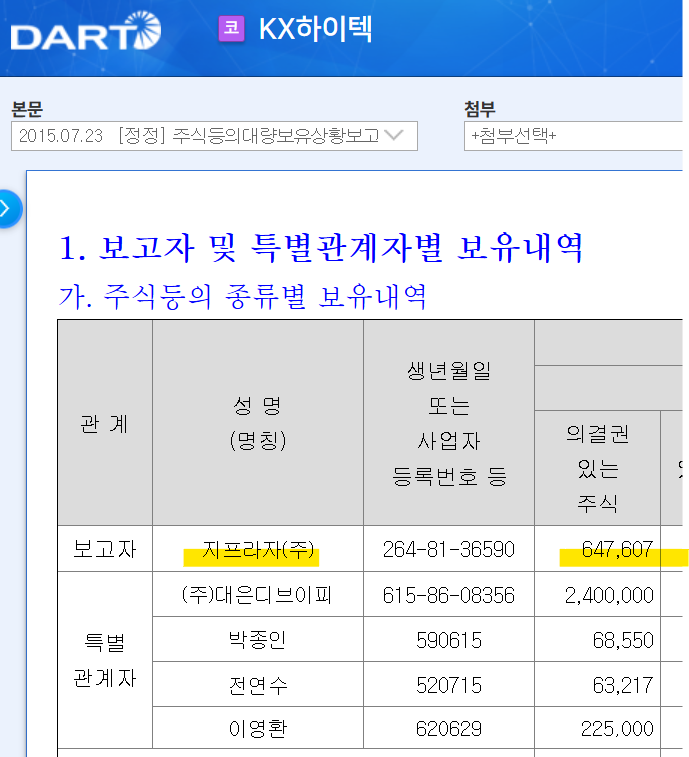

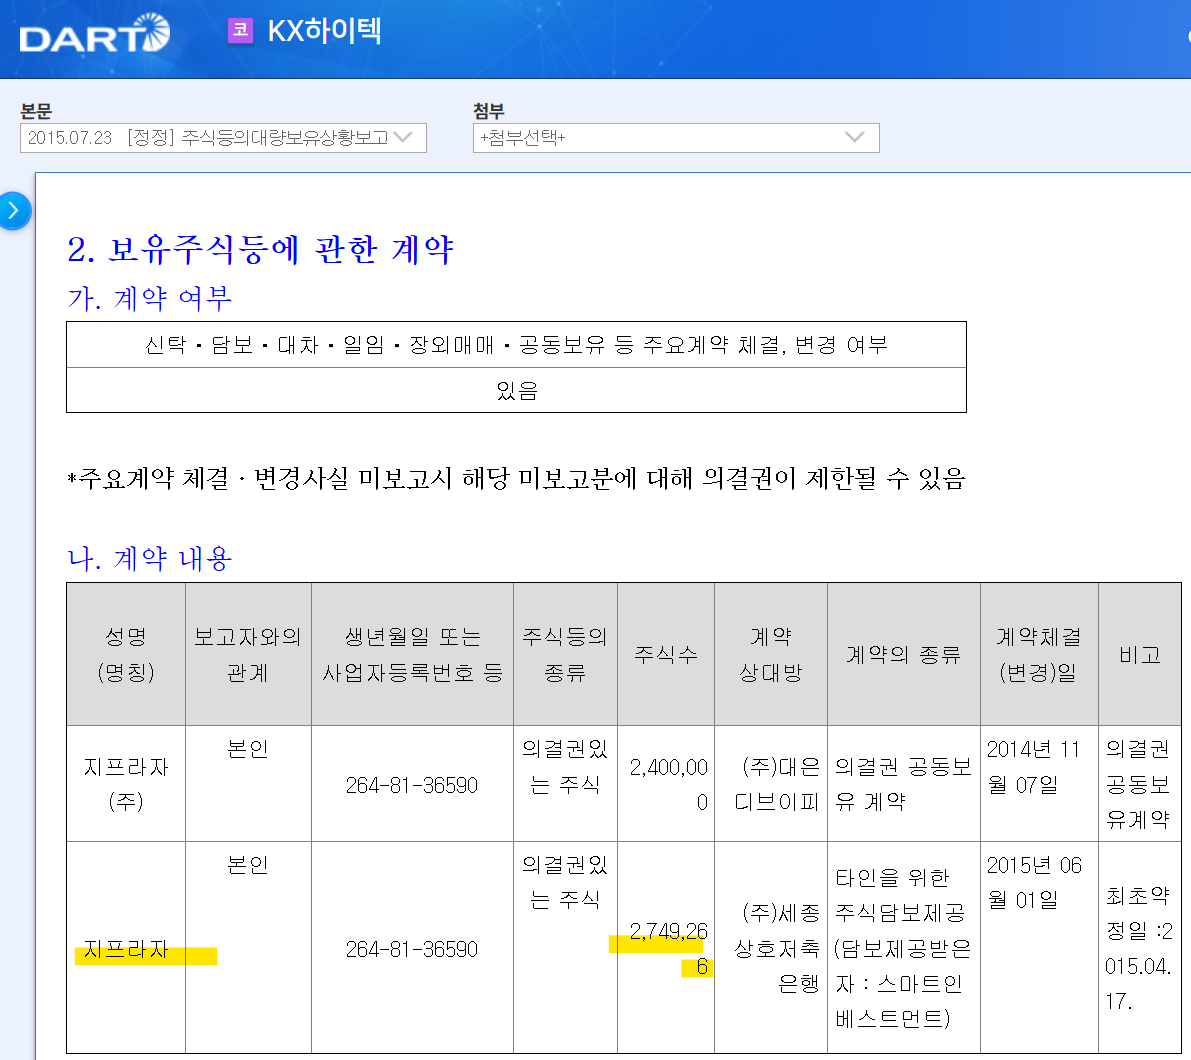

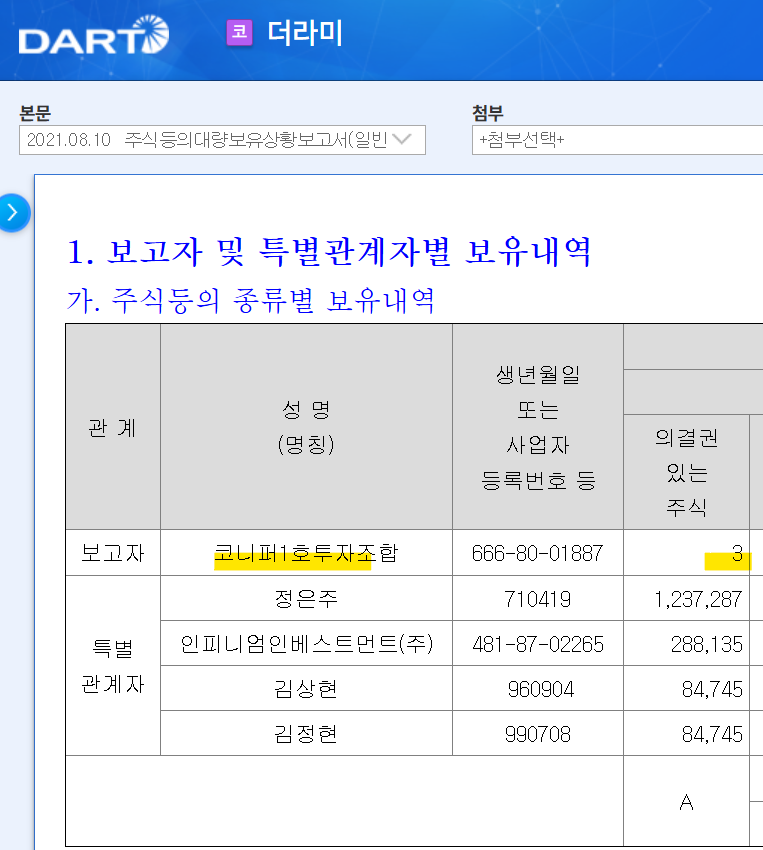

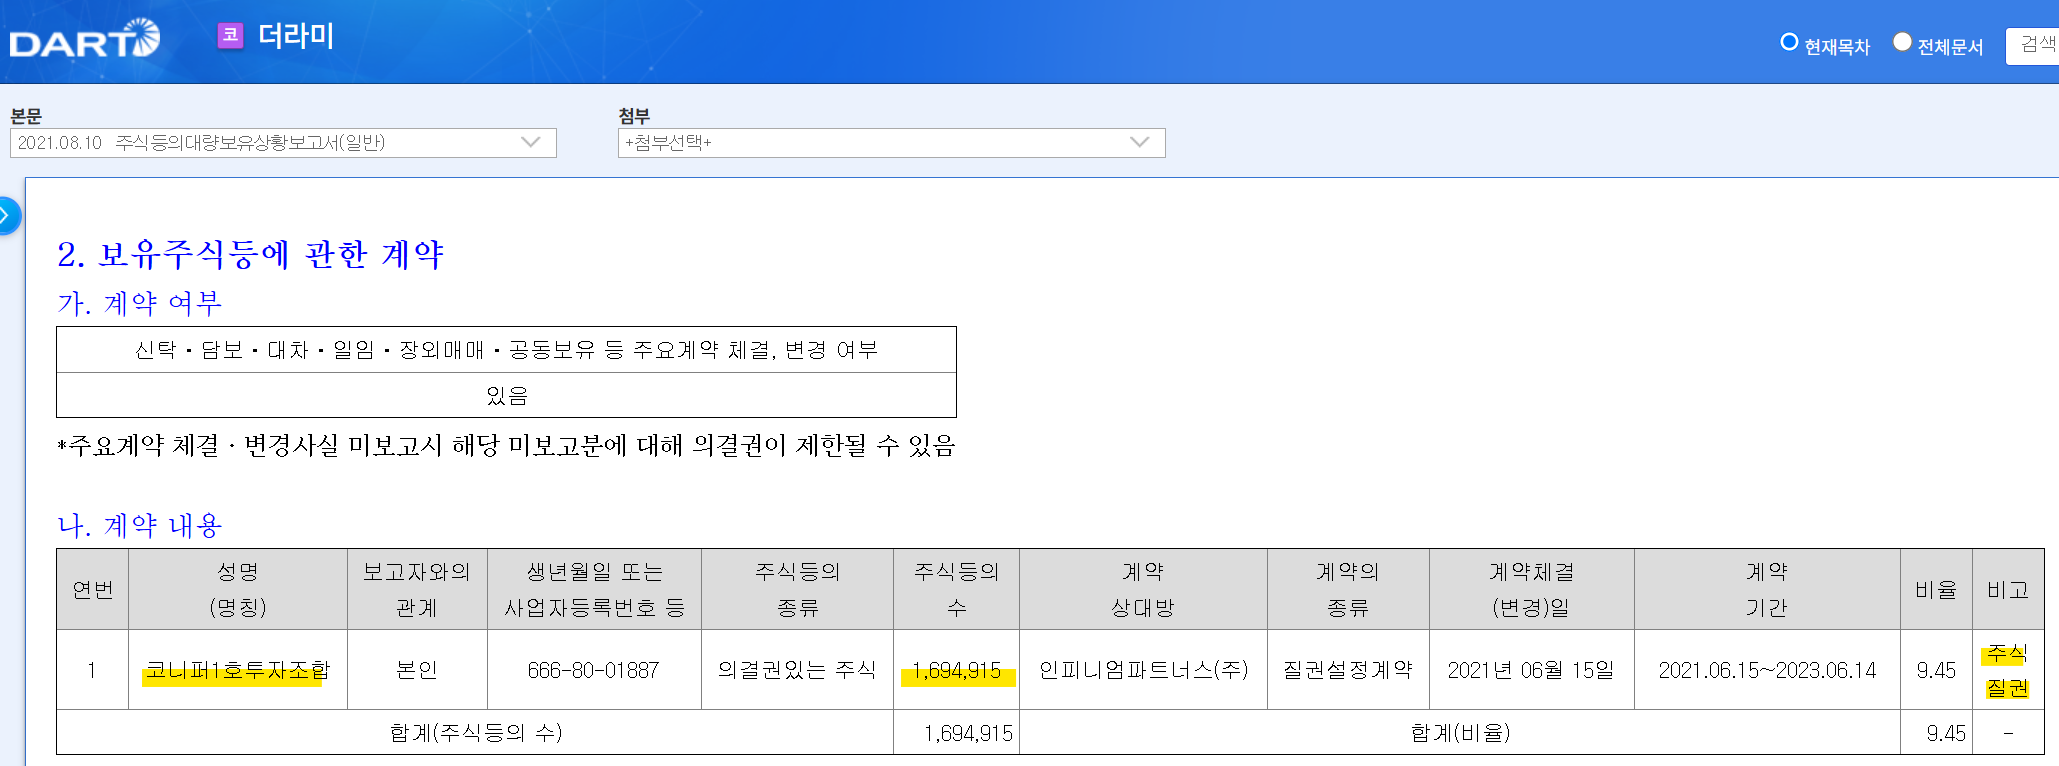